In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('D:\\self study\\Naresh IT\\Data Science\\12.Classification\\penguins_size.csv')
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [5]:
df['island'].value_counts()


Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [6]:
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [7]:
df= df[df['sex']!='.']
df.shape

(343, 7)

<AxesSubplot:xlabel='culmen_length_mm'>

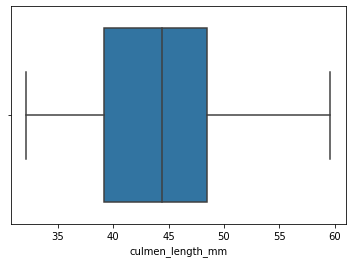

In [8]:
sns.boxplot(df['culmen_length_mm'])

<AxesSubplot:xlabel='culmen_depth_mm'>

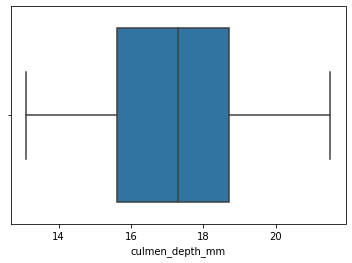

In [9]:
sns.boxplot(df['culmen_depth_mm'])

<AxesSubplot:xlabel='flipper_length_mm'>

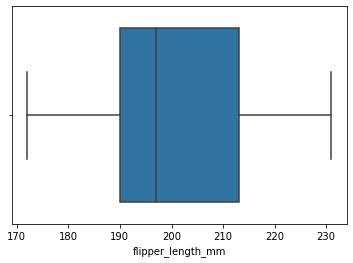

In [10]:
sns.boxplot(df['flipper_length_mm'])

<AxesSubplot:xlabel='body_mass_g'>

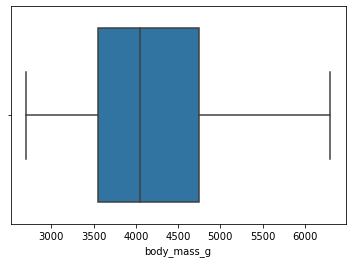

In [11]:
sns.boxplot(df['body_mass_g'])

<AxesSubplot:xlabel='sex', ylabel='count'>

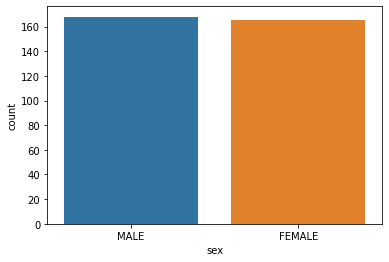

In [12]:
sns.countplot(x='sex',data = df)

<AxesSubplot:xlabel='species', ylabel='count'>

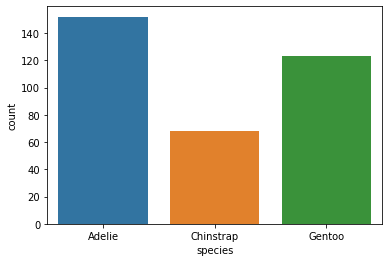

In [13]:
sns.countplot(x='species',data = df)

<AxesSubplot:xlabel='island', ylabel='count'>

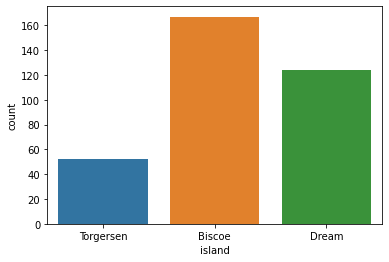

In [14]:
sns.countplot(x='island',data = df)

In [15]:
pd.crosstab(df['species'],df['island'],margins = True)

island     Biscoe  Dream  Torgersen  All
species                                 
Adelie         44     56         52  152
Chinstrap       0     68          0   68
Gentoo        123      0          0  123
All           167    124         52  343

In [16]:
pd.crosstab(df['species'],df['sex'],margins = True)

sex        FEMALE  MALE  All
species                     
Adelie         73    73  146
Chinstrap      34    34   68
Gentoo         58    61  119
All           165   168  333

In [17]:
df.describe()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        341.000000       341.000000         341.000000   341.000000
mean          43.920235        17.155425         200.868035  4199.780059
std            5.467516         1.976124          14.055255   802.300201
min           32.100000        13.100000         172.000000  2700.000000
25%           39.200000        15.600000         190.000000  3550.000000
50%           44.400000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

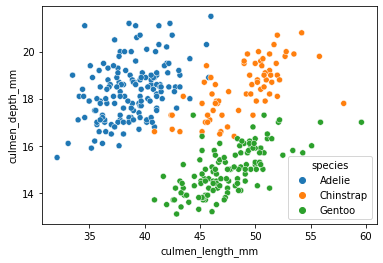

In [18]:
sns.scatterplot(x='culmen_length_mm', y = 'culmen_depth_mm',data=df,hue='species')

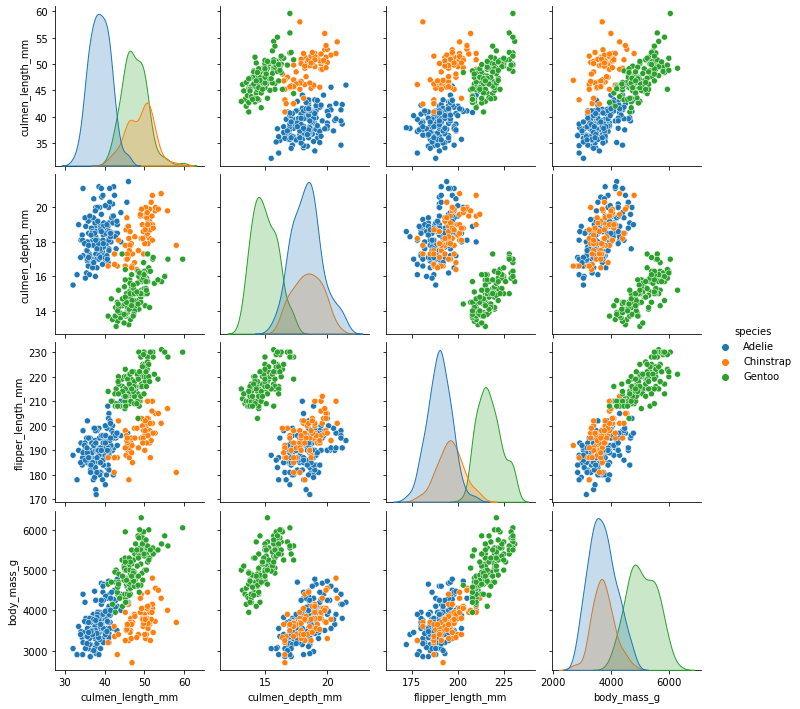

In [19]:
sns.pairplot(df,hue='species')

In [20]:
df.corr()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.235015           0.657102   
culmen_depth_mm           -0.235015         1.000000          -0.582964   
flipper_length_mm          0.657102        -0.582964           1.000000   
body_mass_g                0.595476        -0.470963           0.870956   

                   body_mass_g  
culmen_length_mm      0.595476  
culmen_depth_mm      -0.470963  
flipper_length_mm     0.870956  
body_mass_g           1.000000

<AxesSubplot:>

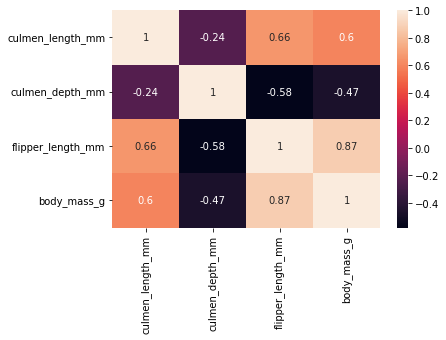

In [21]:
sns.heatmap(df.corr(),annot=True)

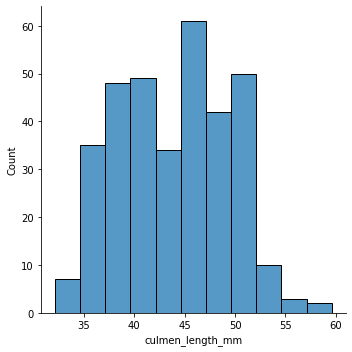

In [22]:
sns.displot(df.culmen_length_mm)

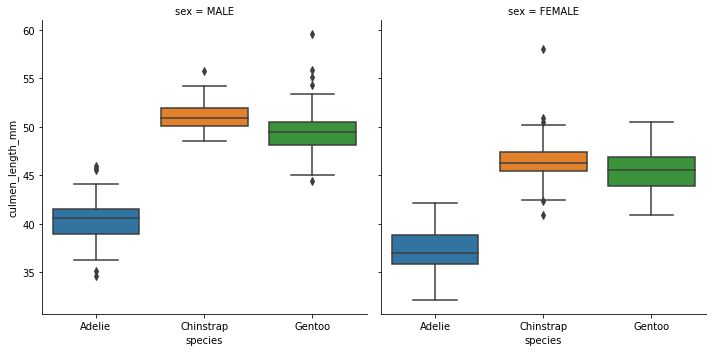

In [23]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex')

In [24]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

# replacing the missing value 

In [25]:
df.culmen_length_mm.mean()

43.92023460410559

In [26]:
df.flipper_length_mm.mean()

200.86803519061584

In [27]:
df.culmen_depth_mm.mean()

17.155425219941353

In [28]:
df.sex.mode()

0    MALE
dtype: object

In [29]:
df.body_mass_g.mean()

4199.780058651027

In [30]:
df.culmen_length_mm.fillna(df.culmen_length_mm.mean(),inplace=True)
df.flipper_length_mm.fillna(200.915,inplace=True)
df.culmen_depth_mm.fillna(17.151,inplace=True)
df.sex.fillna(df.sex.mode()[0],inplace=True)
df.body_mass_g.fillna(4201.754,inplace=True)

In [31]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# encoding

In [32]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0           39.100000           18.700            181.000     3750.000   
1           39.500000           17.400            186.000     3800.000   
2           40.300000           18.000            195.000     3250.000   
3           43.920235           17.151            200.915     4201.754   
4           36.700000           19.300            193.000     3450.000   
..                ...              ...                ...          ...   
339         43.920235           17.151            200.915     4201.754   
340         46.800000           14.300            215.000     4850.000   
341         50.400000           15.700            222.000     5750.000   
342         45.200000           14.800            212.000     5200.000   
343         49.900000           16.100            213.000     5400.000   

     island_Dream  island_Torgersen  sex_MALE  
0               0                 1         1  
1               0                 1         0  
2               0                 1         0  
3               0                 1         1  
4               0                 1         0  
..            ...               ...       ...  
339             0                 0         1  
340             0                 0         0  
341             0                 0         1  
342             0                 0         0  
343             0                 0         1  

[343 rows x 7 columns]

In [33]:
X=pd.get_dummies(df.drop('species',axis=1),drop_first=True)

y=df['species']

# train test split

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=101,test_size=.3)

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=101)
dtc.fit(X_train,y_train)

train_prediction= dtc.predict(X_train)
test_prediction= dtc.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,train_prediction))
print(accuracy_score(y_test,test_prediction))

from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,X,y,cv=5)
print(score)

score.mean()

1.0
0.970873786407767
[0.98550725 0.98550725 0.98550725 0.94117647 0.95588235]


0.9707161125319693

# modeling

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dtc=DecisionTreeClassifier(random_state=101)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

## prediction

In [38]:

train_prediction= dtc.predict(X_train)
test_prediction= dtc.predict(X_test)

In [39]:
# accuracy

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,train_prediction))
print(accuracy_score(y_test,test_prediction))

1.0
0.970873786407767


## evaluation

In [40]:
# cross validation score

from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,X,y,cv=5)
print(score)

score.mean()

[0.98550725 0.98550725 0.98550725 0.94117647 0.95588235]


0.9707161125319693

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_test,test_prediction)

array([[40,  1,  0],
       [ 2, 25,  0],
       [ 0,  0, 35]], dtype=int64)

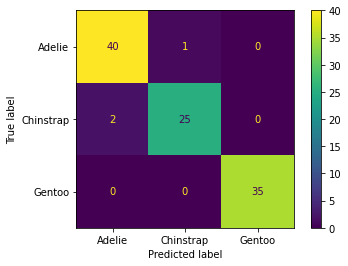

In [43]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dtc,X_test,y_test)

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.96      0.93      0.94        27
      Gentoo       1.00      1.00      1.00        35

    accuracy                           0.97       103
   macro avg       0.97      0.97      0.97       103
weighted avg       0.97      0.97      0.97       103



In [45]:
dtc.feature_importances_

array([0.33245816, 0.05647132, 0.55224336, 0.00892509, 0.028705  ,
       0.00669381, 0.01450326])

In [46]:
pd.DataFrame(index=X.columns,data=dtc.feature_importances_,columns=['feature importance'])

feature importance
culmen_length_mm             0.332458
culmen_depth_mm              0.056471
flipper_length_mm            0.552243
body_mass_g                  0.008925
island_Dream                 0.028705
island_Torgersen             0.006694
sex_MALE                     0.014503

# visualized the tree

In [47]:
from sklearn.tree import plot_tree

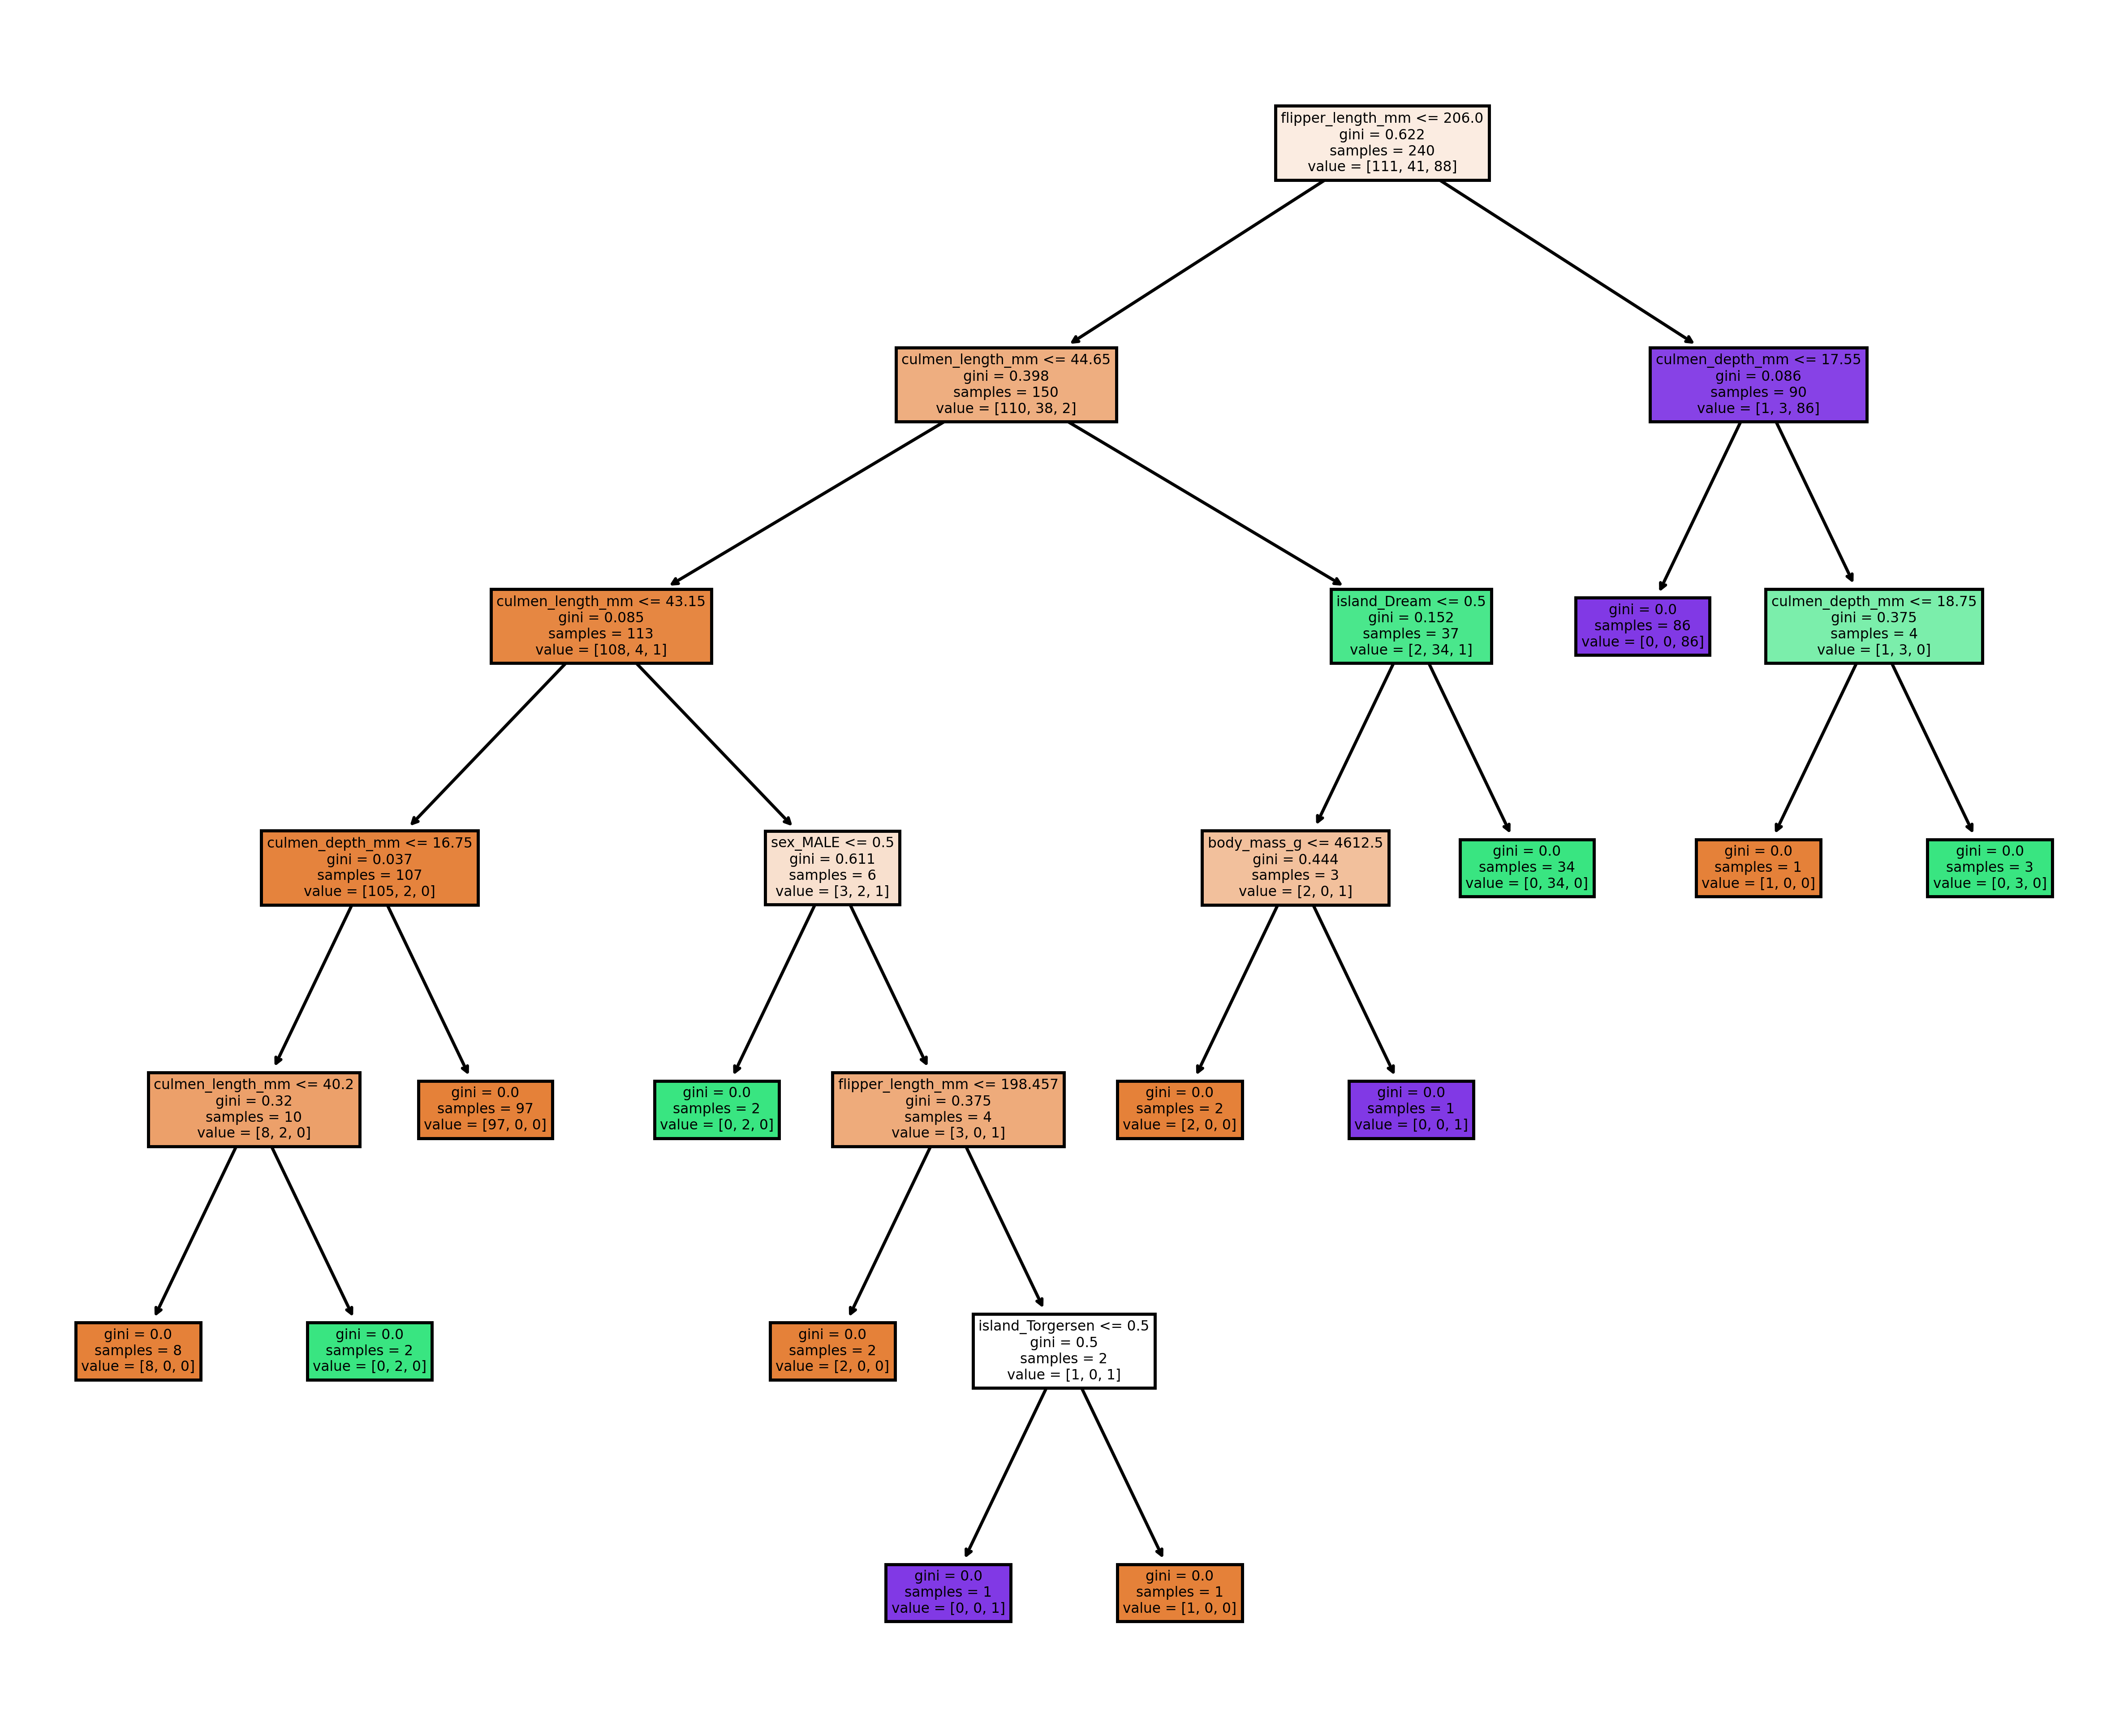

In [48]:
plt.figure(figsize=(12,10),dpi=500)
plot_tree(dtc,filled=True,feature_names= X.columns)
plt.show()

# optimization -- pruning of decision tree

# max dept

Train accuracy: 0.9958333333333333
Test accuracy: 0.970873786407767
[0.98550725 0.98550725 0.98550725 0.94117647 0.95588235]


0.9707161125319693

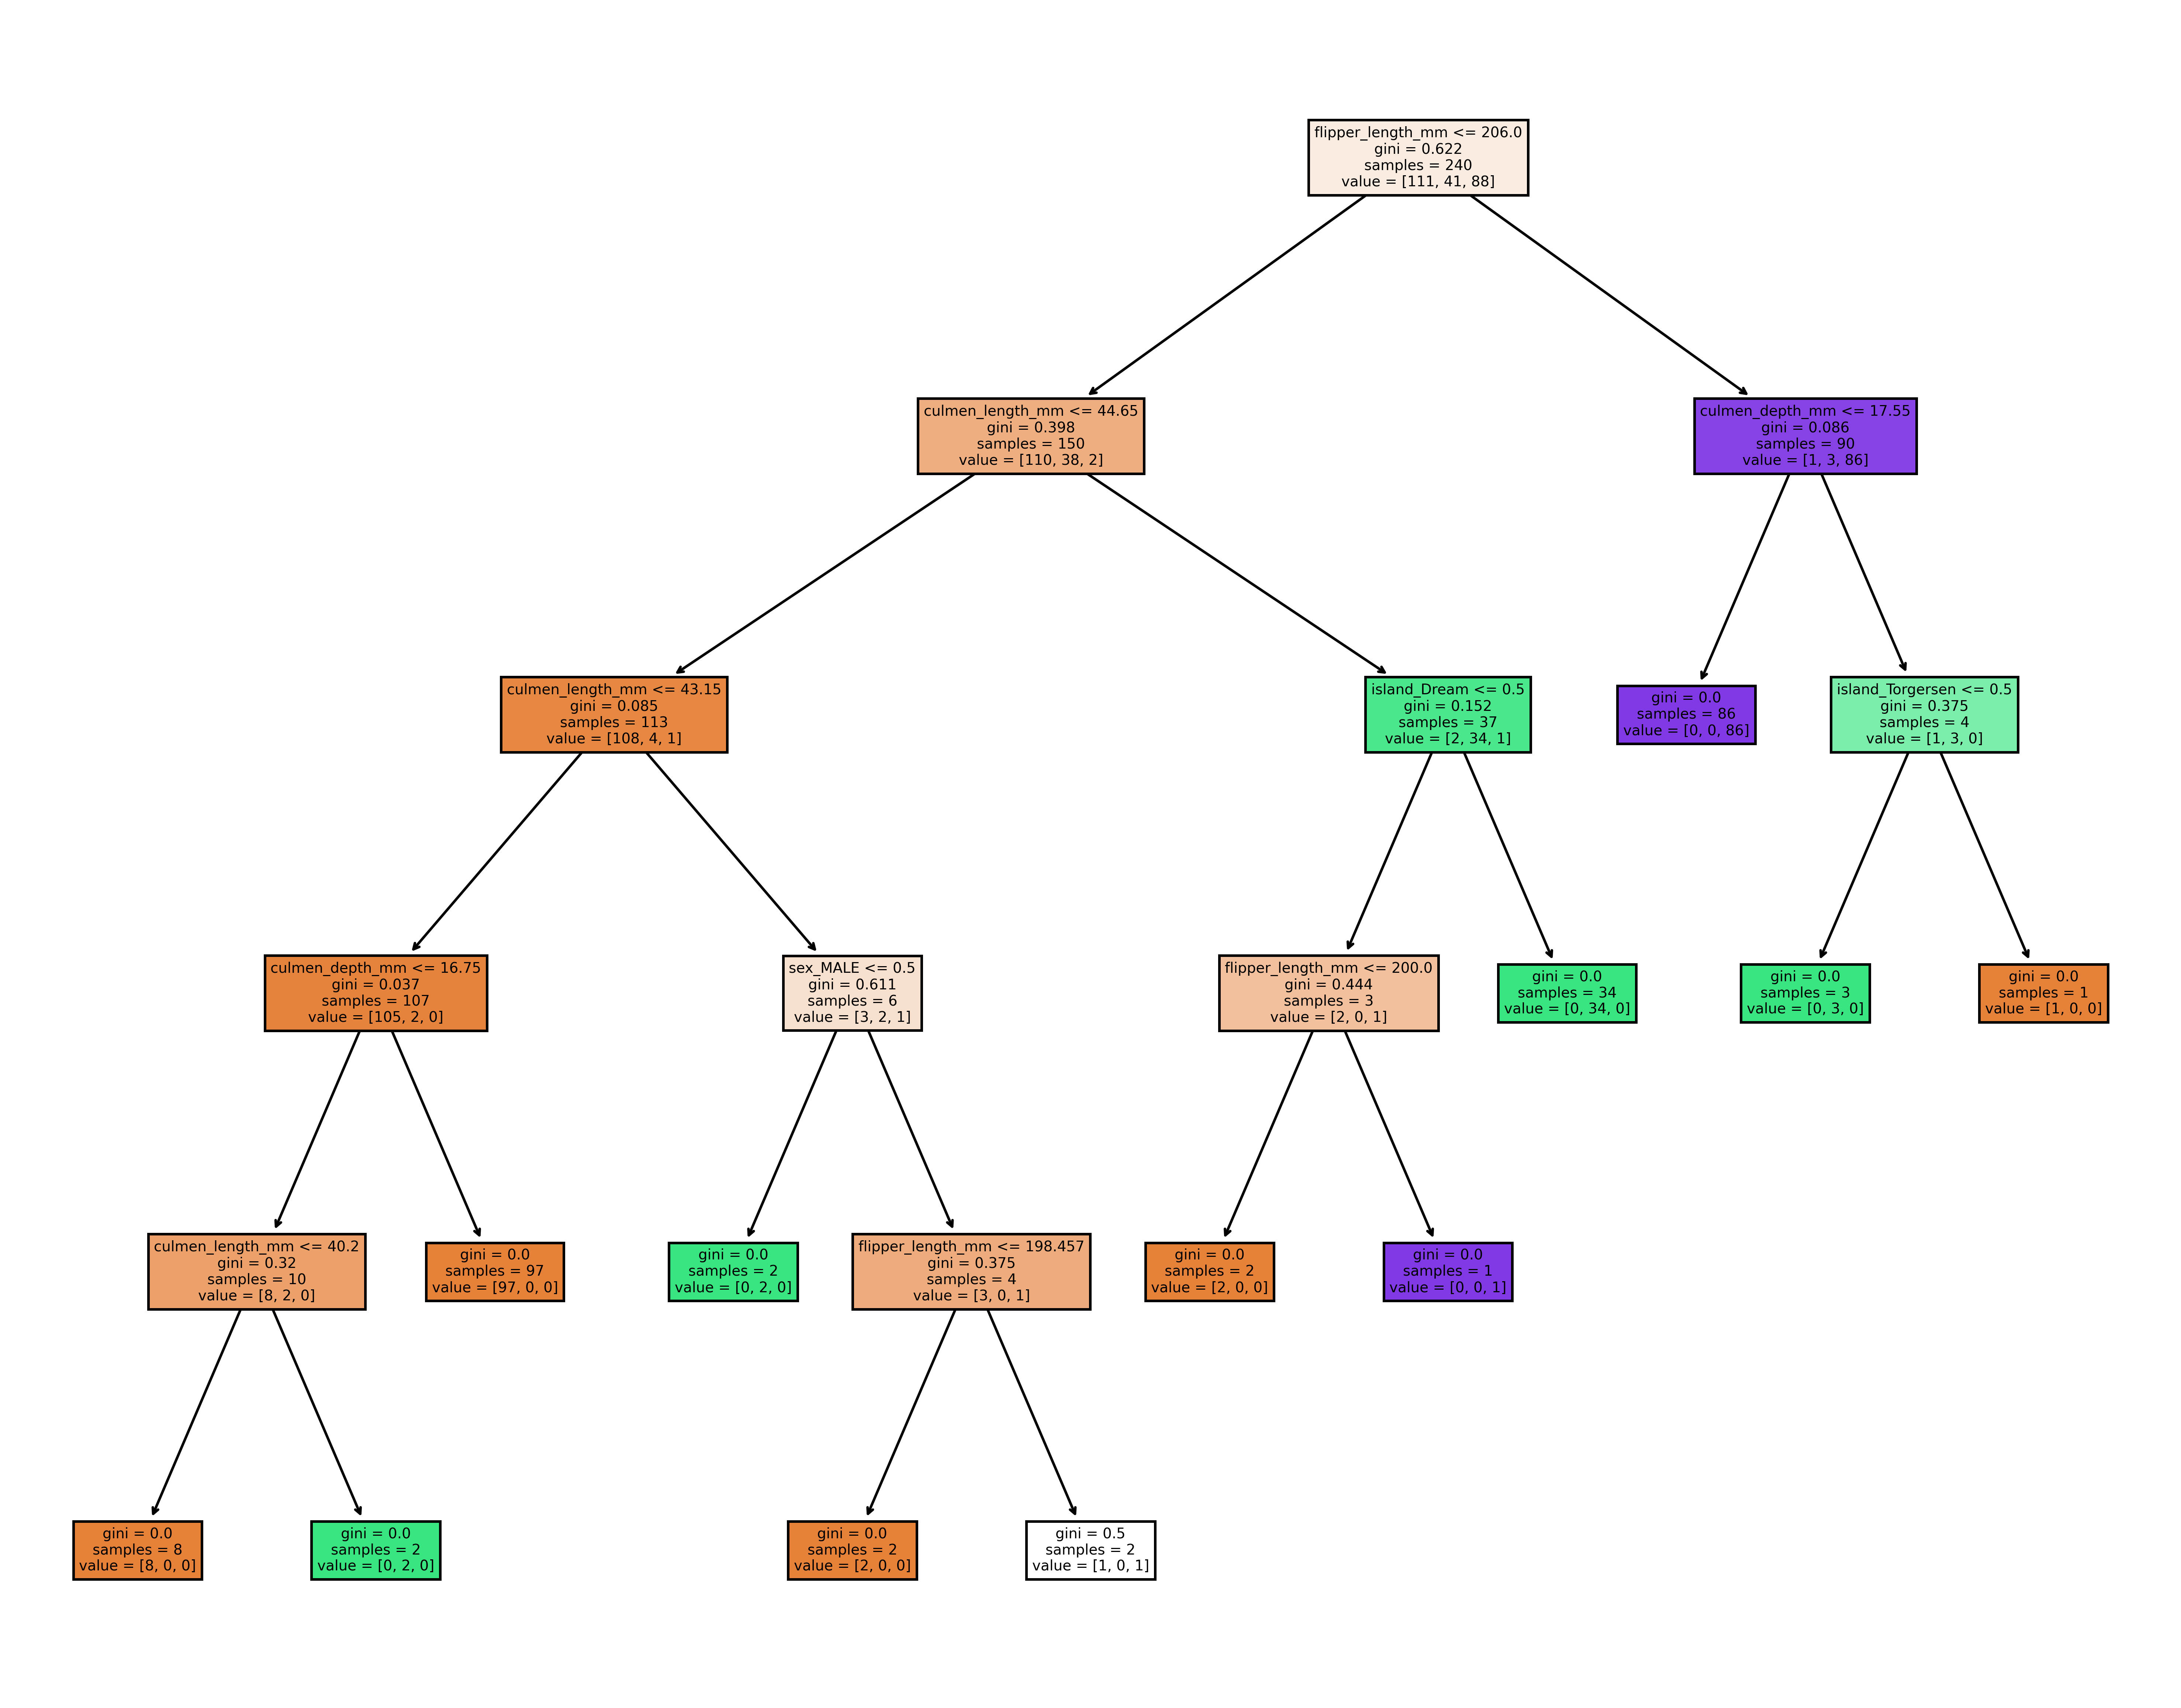

In [49]:
pruned_tree = DecisionTreeClassifier(random_state=101,max_depth=5)
def report_model(dtc):
    dtc.fit(X_train,y_train)
    train_pred=dtc.predict(X_train)
    test_pred= dtc.predict(X_test)
    
    print('Train accuracy:' , accuracy_score(y_train,train_pred))
    print('Test accuracy:' , accuracy_score(y_test,test_pred))
    
    plt.figure(figsize=(15,12),dpi=500)
    plot_tree(dtc,filled=True,feature_names=X.columns)
report_model(pruned_tree)    

score= cross_val_score(dtc,X,y,cv=5)
print(score)
score.mean()

Train accuracy: 0.9875
Test accuracy: 0.970873786407767
[0.98550725 0.98550725 0.98550725 0.94117647 0.95588235]


0.9707161125319693

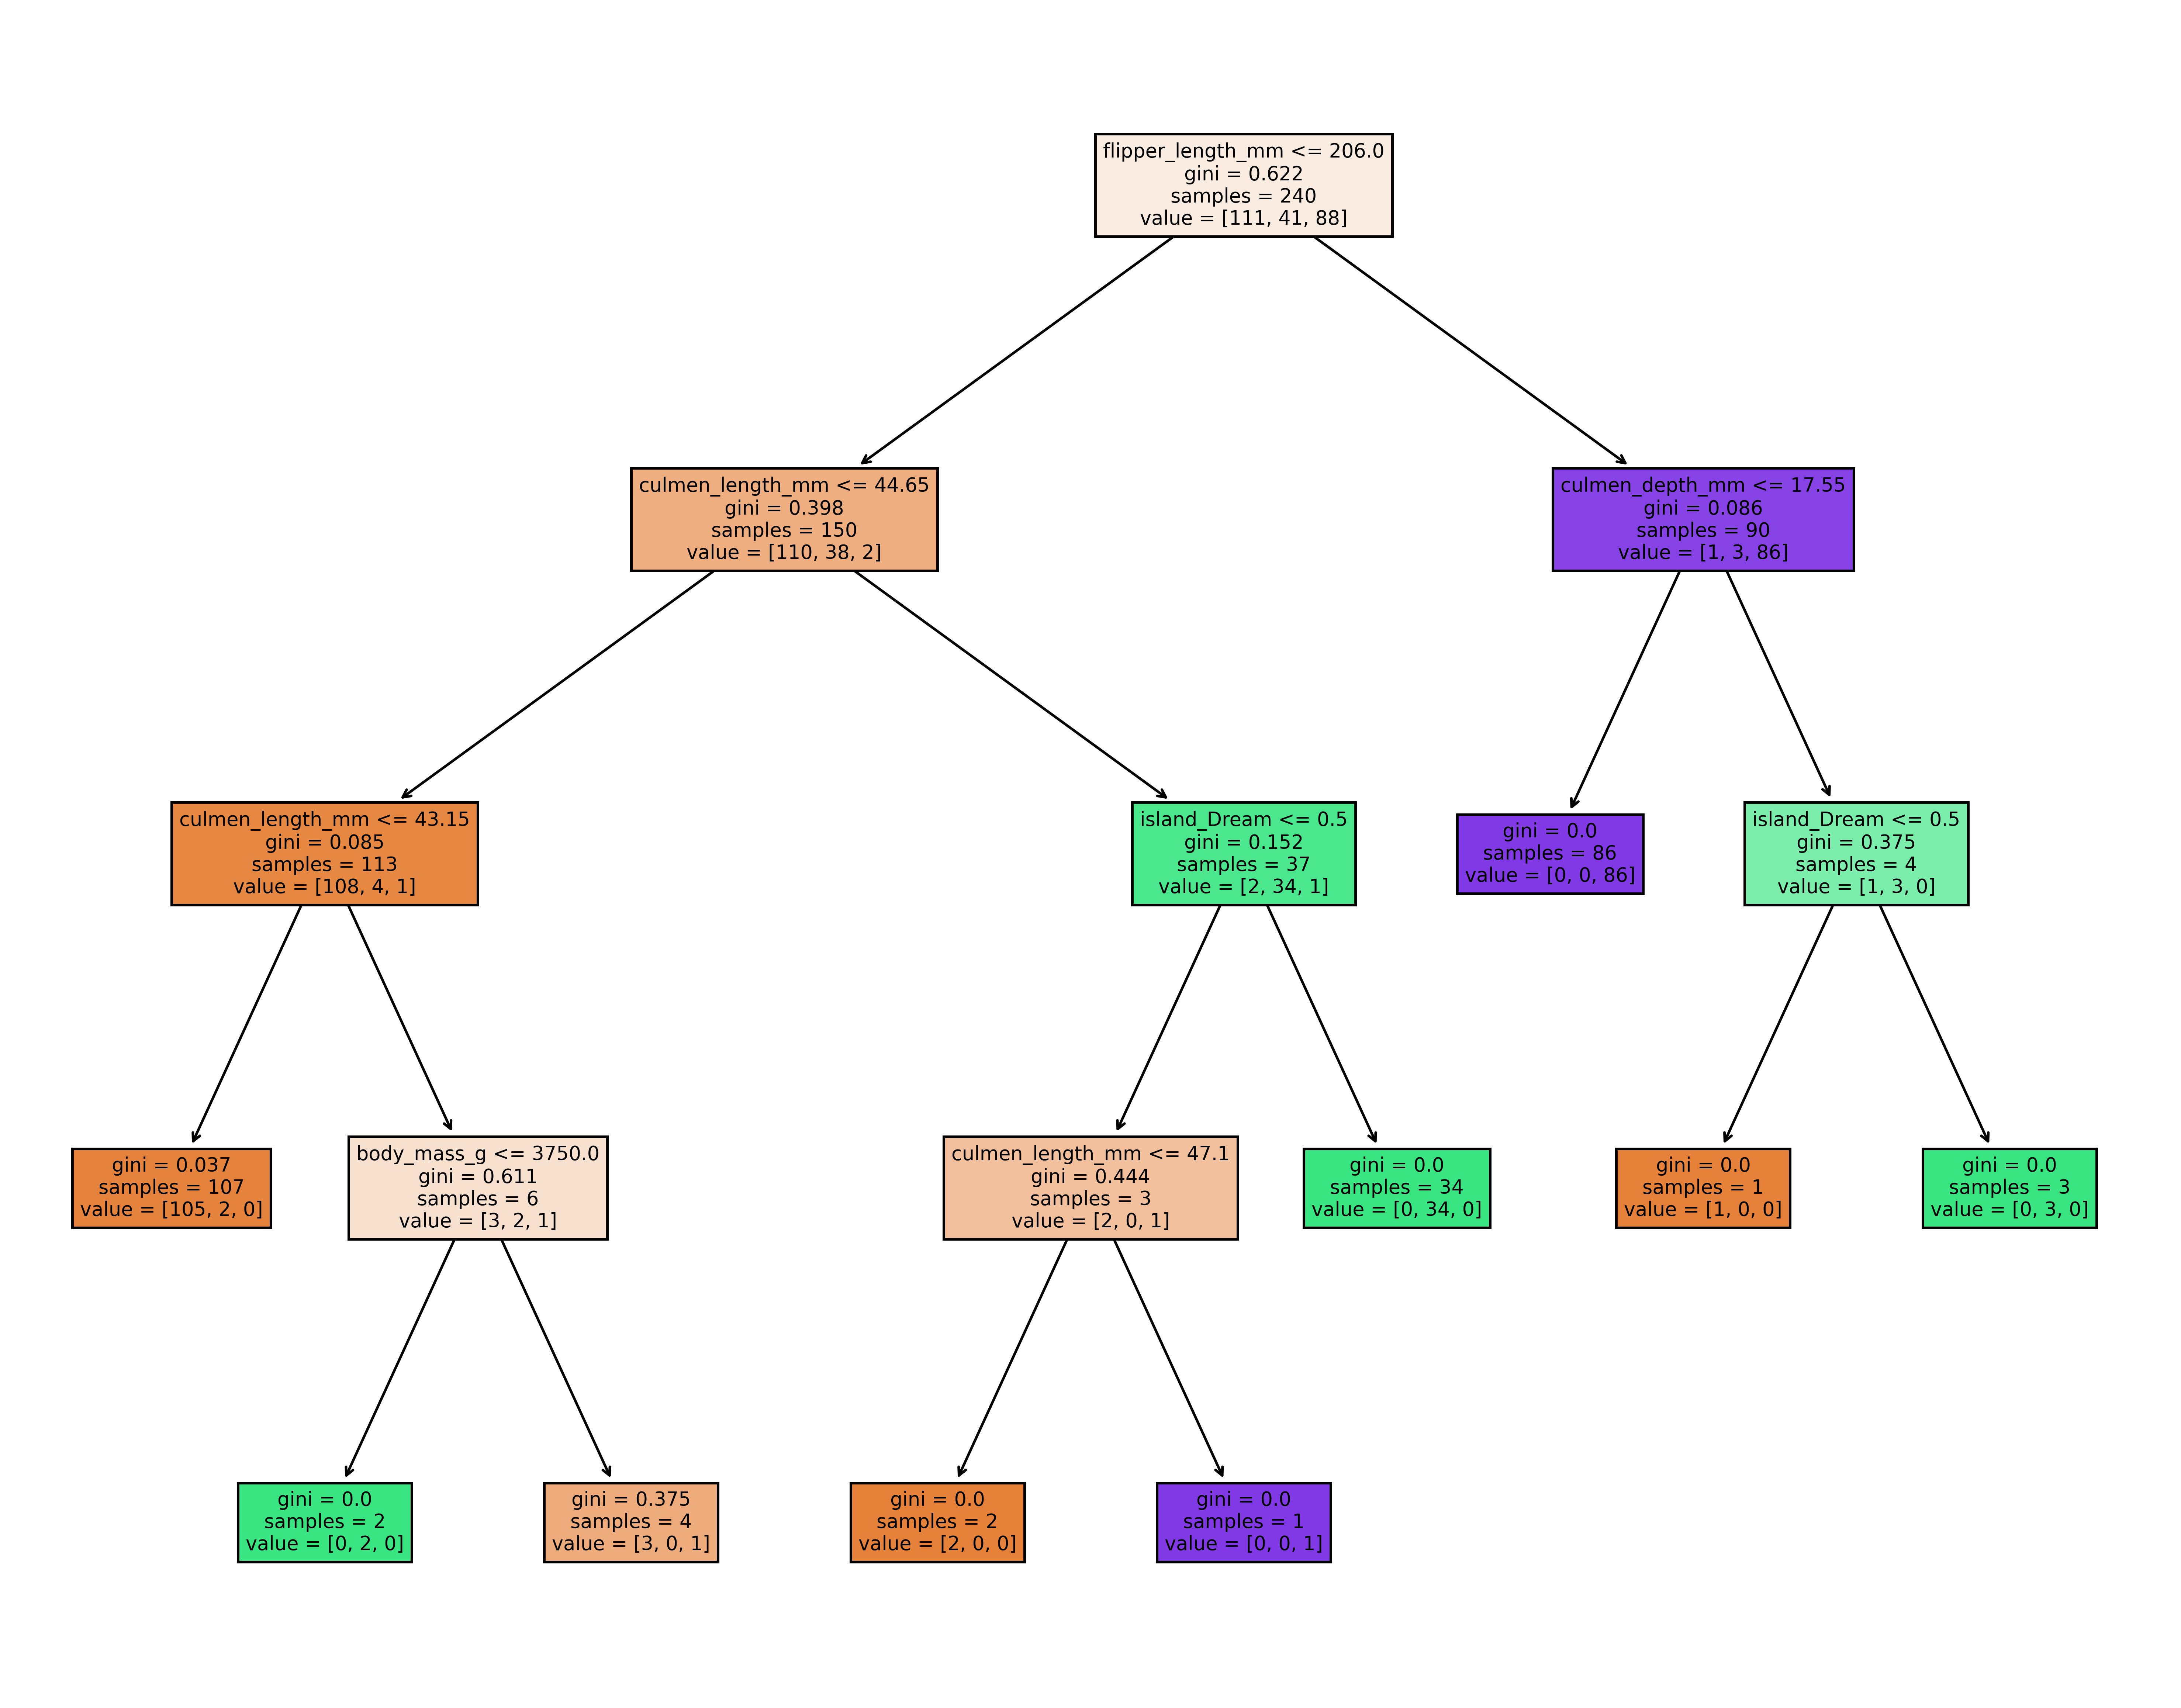

In [50]:
pruned_tree = DecisionTreeClassifier(random_state=101,max_leaf_nodes=9)
report_model(pruned_tree)

score= cross_val_score(dtc,X,y,cv=5)
print(score)
score.mean()

In [51]:
from sklearn.model_selection import GridSearchCV

estimator=DecisionTreeClassifier(random_state=101)
param_grid= {'max_leaf_nodes' : list(range(1,30)),'criterion':['gini','entropy']}

Hp_dtc= GridSearchCV(estimator,param_grid,cv=5, scoring='accuracy')

Hp_dtc.fit(X_train,y_train)

Hp_dtc.best_params_

{'criterion': 'gini', 'max_leaf_nodes': 7}

In [52]:
from sklearn.model_selection import GridSearchCV

estimator=DecisionTreeClassifier(random_state=101)
param_grid= {'max_depth' : list(range(1,15)),'criterion':['gini','entropy']}

Hp_dtc= GridSearchCV(estimator,param_grid,cv=5, scoring='accuracy')

Hp_dtc.fit(X_train,y_train)

Hp_dtc.best_params_

{'criterion': 'gini', 'max_depth': 4}

# rebuilt the final model

Train accuracy: 0.9875
Test accuracy: 0.970873786407767
[0.98550725 0.97101449 0.98550725 0.94117647 0.94117647]


0.9648763853367435

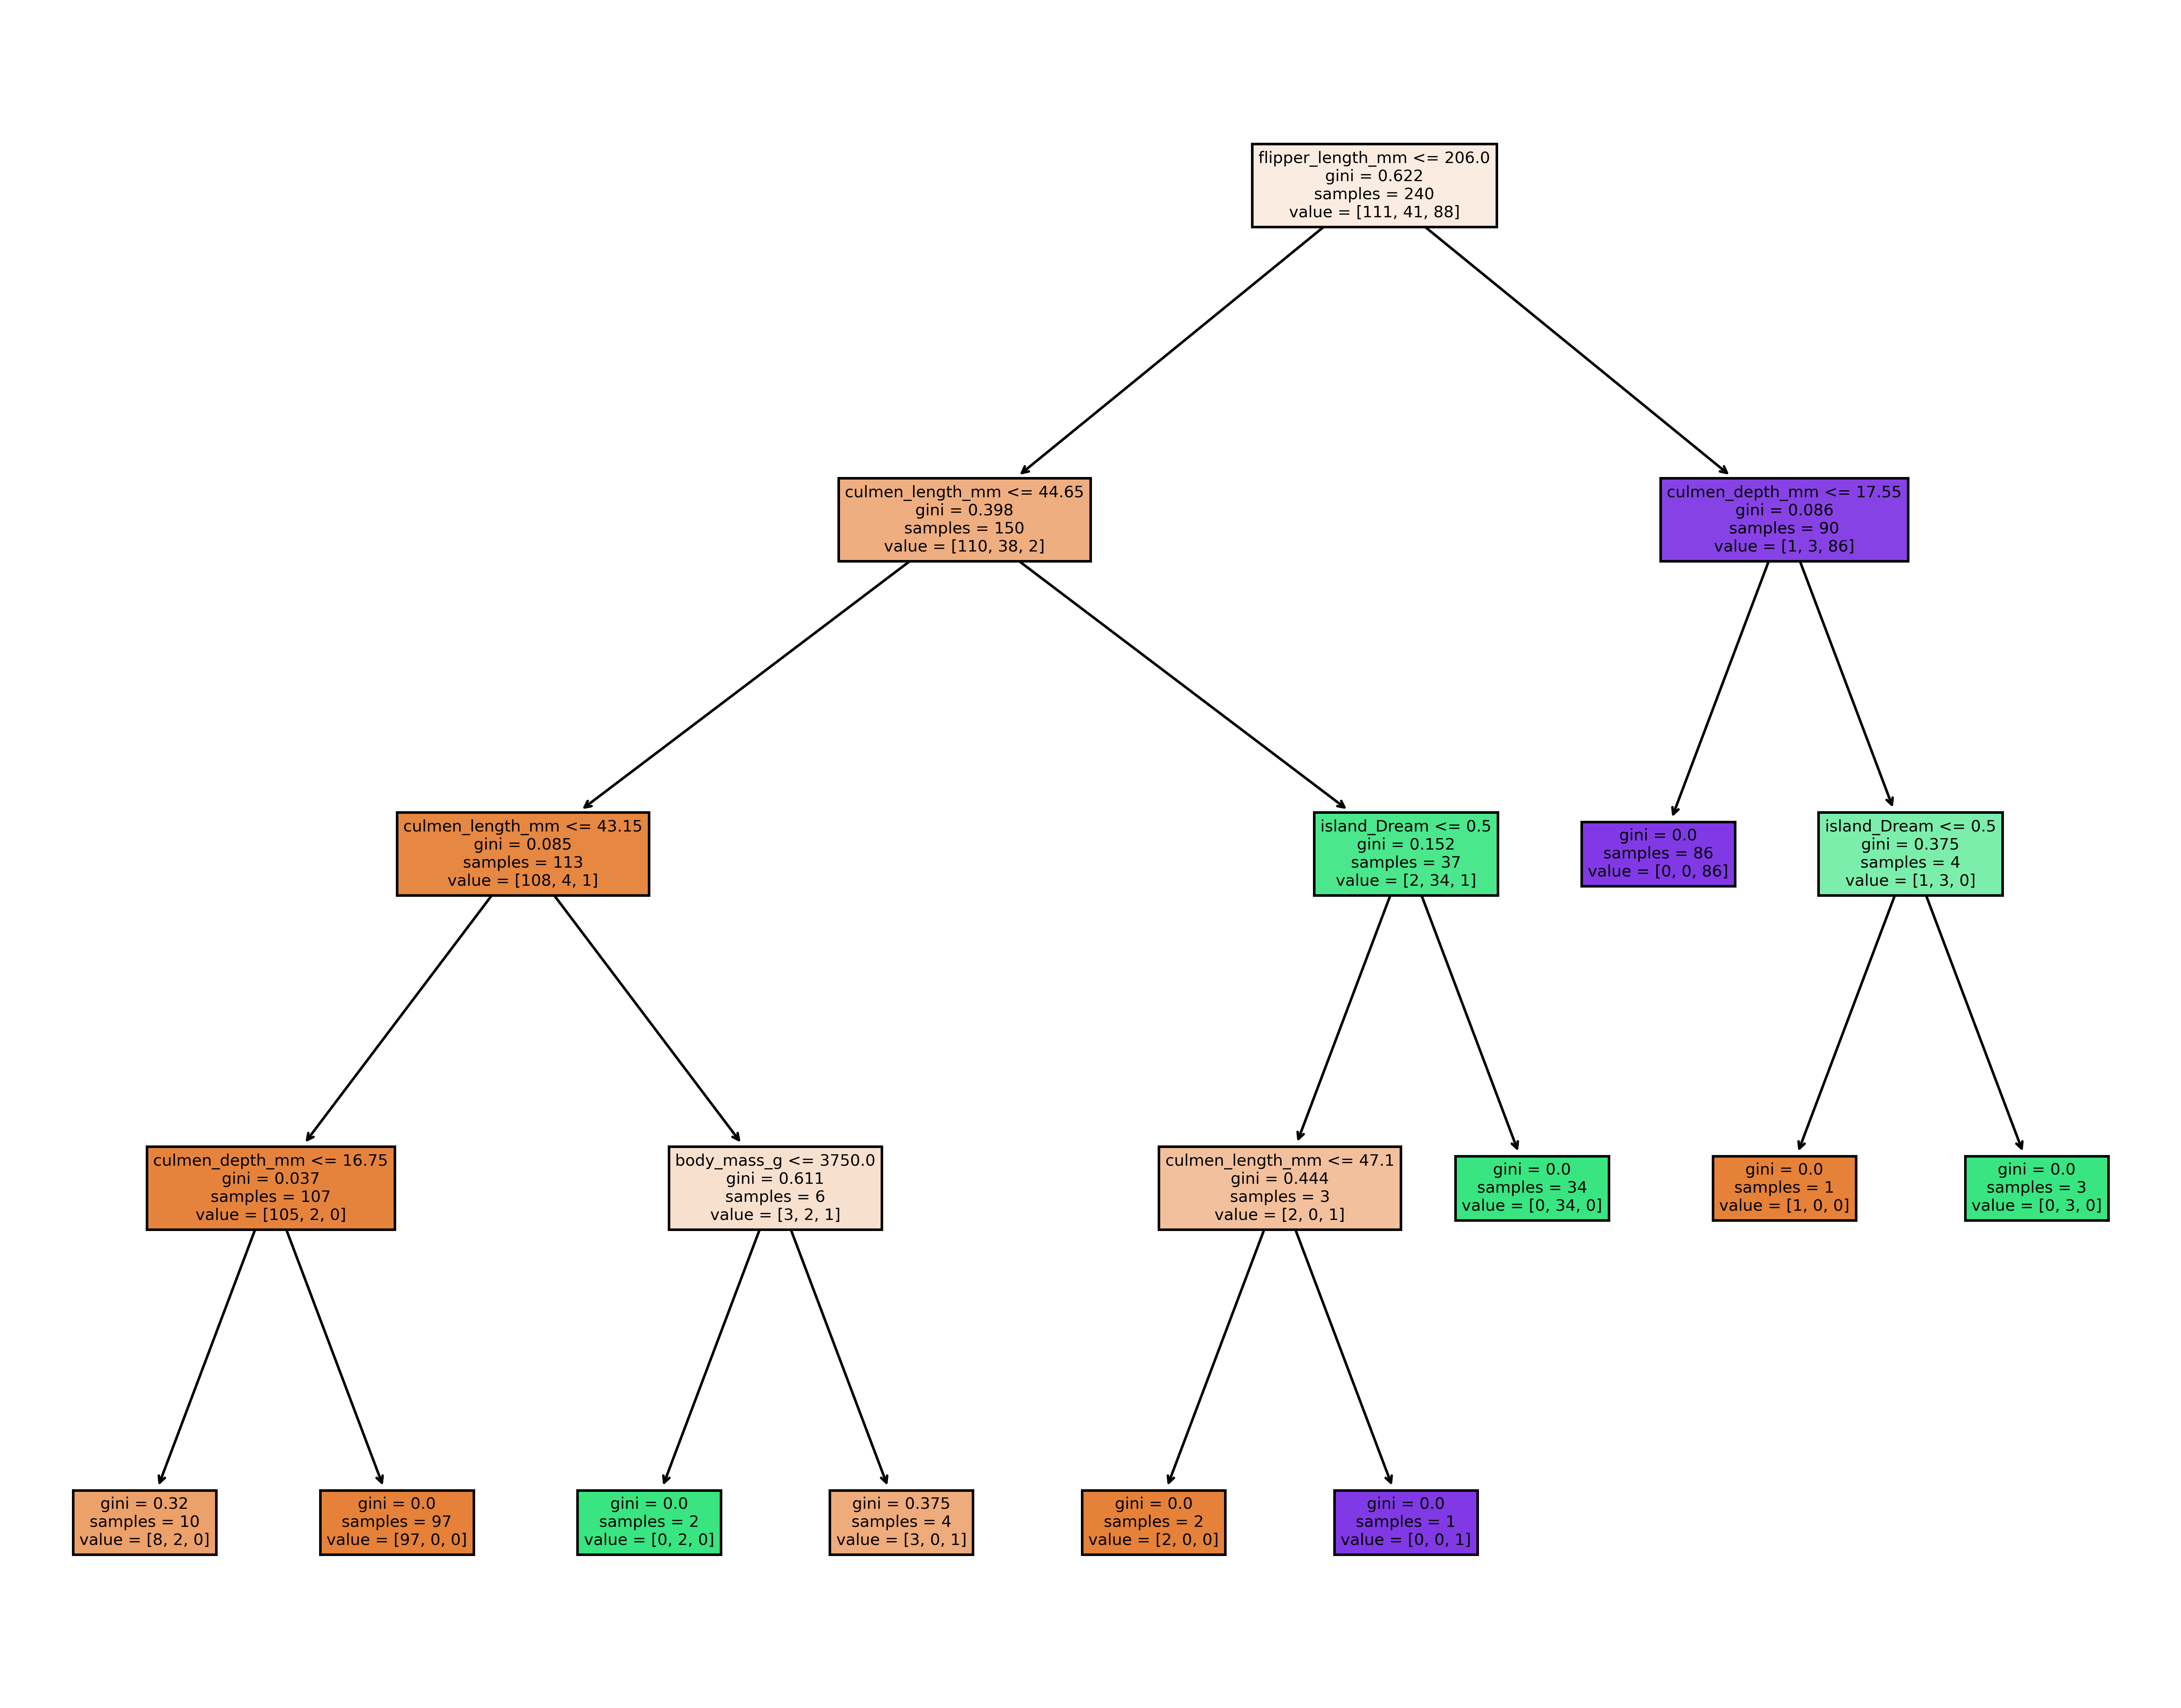

In [53]:
dtc=DecisionTreeClassifier(random_state=101,max_depth=4)
dtc.fit(X_train,y_train)

train_pred=dtc.predict(X_train)
test_pred= dtc.predict(X_test)
    
print('Train accuracy:' , accuracy_score(y_train,train_pred))
print('Test accuracy:' , accuracy_score(y_test,test_pred))
    
plt.figure(figsize=(15,12),dpi=500)
plot_tree(dtc,filled=True,feature_names=X.columns)
   
score= cross_val_score(dtc,X,y,cv=5)
print(score)
score.mean()

Train accuracy: 0.9958333333333333
Test accuracy: 0.970873786407767
[0.98550725 0.98550725 0.98550725 0.94117647 0.95588235]


0.9707161125319693

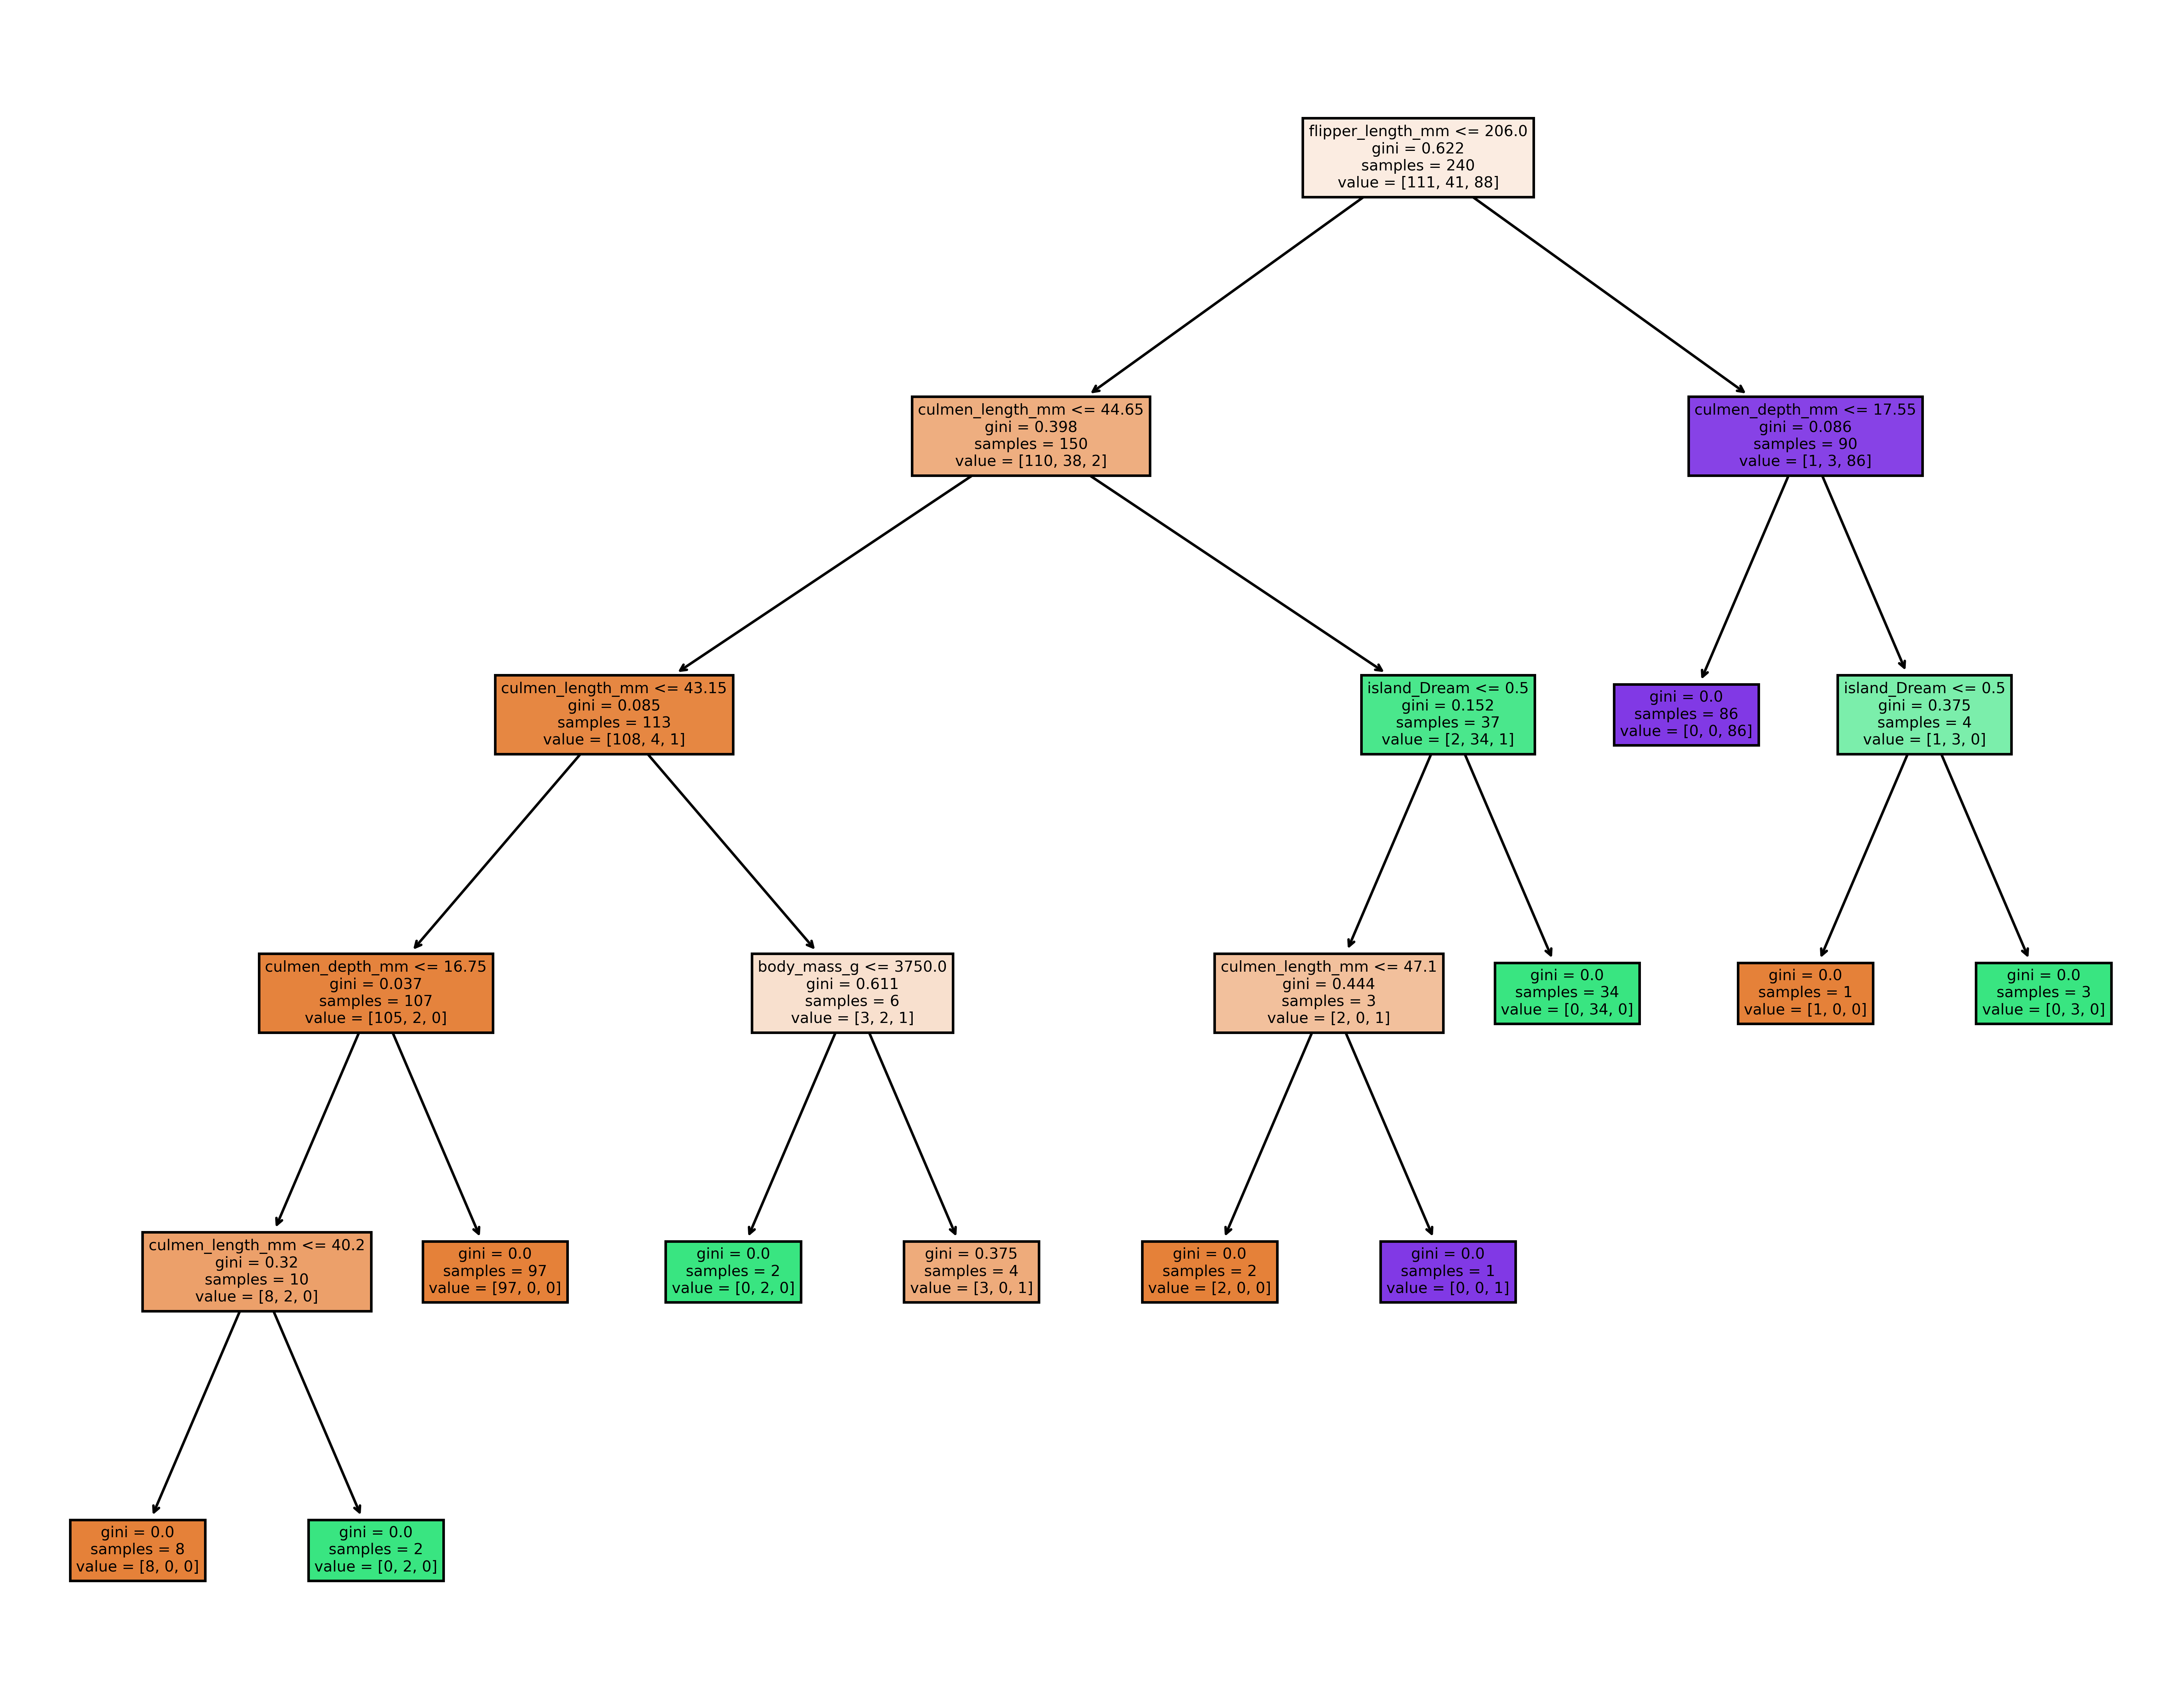

In [54]:
dtc=DecisionTreeClassifier(random_state=101,max_leaf_nodes=11)
dtc.fit(X_train,y_train)

train_pred=dtc.predict(X_train)
test_pred= dtc.predict(X_test)
    
print('Train accuracy:' , accuracy_score(y_train,train_pred))
print('Test accuracy:' , accuracy_score(y_test,test_pred))
    
plt.figure(figsize=(15,12),dpi=500)
plot_tree(dtc,filled=True,feature_names=X.columns)
   
score= cross_val_score(dtc,X,y,cv=5)
print(score)
score.mean()